In [4]:
! pip install xgboost

^C


In [307]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold




In [308]:
Features = pd.read_csv("features.csv")
Sales = pd.read_csv("sales.csv")
Stores = pd.read_csv("stores.csv")


In [309]:
Features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [310]:
Sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [311]:
Stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [312]:
for Feature in Features:
    if(Features[Feature].isnull().values.any()):
        print(f"  {Feature} has NaN to be taken care of")
    else:
        print(f"  {Feature} has no NaN ")     
    

  Store has no NaN 
  Date has no NaN 
  Temperature has no NaN 
  Fuel_Price has no NaN 
  MarkDown1 has NaN to be taken care of
  MarkDown2 has NaN to be taken care of
  MarkDown3 has NaN to be taken care of
  MarkDown4 has NaN to be taken care of
  MarkDown5 has NaN to be taken care of
  CPI has NaN to be taken care of
  Unemployment has NaN to be taken care of
  IsHoliday has no NaN 


In [313]:
for Sale in Sales:
    if(Sales[Sale].isnull().values.any()):
        print(f" {Sale} has NaN to be taken care of")
    else:
        print(f" {Sale} has no NaN")      
    

 Store has no NaN
 Dept has no NaN
 Date has no NaN
 Weekly_Sales has no NaN
 IsHoliday has no NaN


In [314]:
for Store in Stores:
    if(Stores[Store].isnull().values.any()):
        print(f" {Store} has NaN to be taken care of")
    else:
        print(f"{Store} has no NaN")   

Store has no NaN
Type has no NaN
Size has no NaN


In [315]:
Features["Date"] = pd.to_datetime(Features["Date"])
Sales["Date"] = pd.to_datetime(Sales["Date"])

In [316]:
for Feature in Features:
        Features[Feature].fillna(value=Features[Feature].mean(), inplace=True)

In [317]:
for Feature in Features:
    if(Features[Feature].isnull().values.any()):
        print(f"  {Feature} has NaN to be taken care of")
    else:
        print(f"  {Feature} has no NaN ")      
    

  Store has no NaN 
  Date has no NaN 
  Temperature has no NaN 
  Fuel_Price has no NaN 
  MarkDown1 has no NaN 
  MarkDown2 has no NaN 
  MarkDown3 has no NaN 
  MarkDown4 has no NaN 
  MarkDown5 has no NaN 
  CPI has no NaN 
  Unemployment has no NaN 
  IsHoliday has no NaN 


In [318]:
Features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,False


In [319]:
Sales = Sales.drop(["IsHoliday"], axis = 1)

In [320]:
Merged = Features.merge(Sales, how = 'left', on = ['Date', 'Store'])

In [321]:
Merged = Merged.merge(Stores, how = "left", on = ["Store"])

In [322]:
Merged

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False,1.0,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False,2.0,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False,3.0,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False,4.0,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False,5.0,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.290000,975.030000,3.00000,2449.970000,3169.690000,172.460809,7.826821,False,NaN,NaN,B,118221
423321,45,2013-07-05,77.50,3.614,9090.480000,2268.580000,582.74000,5797.470000,1514.930000,172.460809,7.826821,False,NaN,NaN,B,118221
423322,45,2013-07-12,79.37,3.614,3789.940000,1827.310000,85.72000,744.840000,2150.360000,172.460809,7.826821,False,NaN,NaN,B,118221
423323,45,2013-07-19,82.84,3.737,2961.490000,1047.070000,204.19000,363.000000,1059.460000,172.460809,7.826821,False,NaN,NaN,B,118221


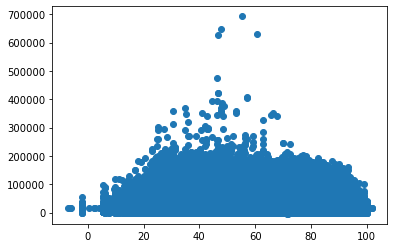

In [323]:
plt.scatter(merged_df["Temperature"], merged_df["Weekly_Sales"])

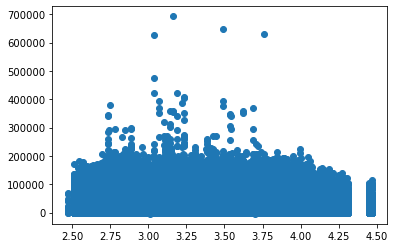

In [324]:
plt.scatter(merged_df["Fuel_Price"], merged_df["Weekly_Sales"])

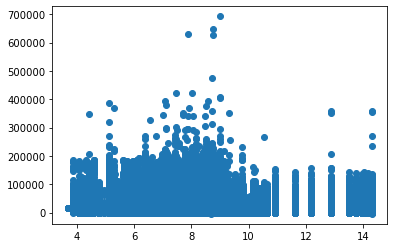

In [325]:
plt.scatter(merged_df["Unemployment"], merged_df["Weekly_Sales"])

In [326]:
le1 = preprocessing.LabelEncoder()
Merged["Type"] = le1.fit_transform(Merged["Type"])
le2 = preprocessing.LabelEncoder()
Merged["IsHoliday"] = le1.fit_transform(Merged["IsHoliday"])
Merged

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,1.0,24924.50,0,151315
1,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,2.0,50605.27,0,151315
2,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,3.0,13740.12,0,151315
3,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,4.0,39954.04,0,151315
4,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,5.0,32229.38,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.290000,975.030000,3.00000,2449.970000,3169.690000,172.460809,7.826821,0,NaN,NaN,1,118221
423321,45,2013-07-05,77.50,3.614,9090.480000,2268.580000,582.74000,5797.470000,1514.930000,172.460809,7.826821,0,NaN,NaN,1,118221
423322,45,2013-07-12,79.37,3.614,3789.940000,1827.310000,85.72000,744.840000,2150.360000,172.460809,7.826821,0,NaN,NaN,1,118221
423323,45,2013-07-19,82.84,3.737,2961.490000,1047.070000,204.19000,363.000000,1059.460000,172.460809,7.826821,0,NaN,NaN,1,118221


In [327]:
for feature in Merged:
        Merged[feature].fillna(value= Merged[feature].mean(), inplace=True)

In [328]:
Merged

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,1.000000,24924.500000,0,151315
1,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,2.000000,50605.270000,0,151315
2,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,3.000000,13740.120000,0,151315
3,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,4.000000,39954.040000,0,151315
4,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,5.000000,32229.380000,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.290000,975.030000,3.00000,2449.970000,3169.690000,172.460809,7.826821,0,44.260317,15981.258123,1,118221
423321,45,2013-07-05,77.50,3.614,9090.480000,2268.580000,582.74000,5797.470000,1514.930000,172.460809,7.826821,0,44.260317,15981.258123,1,118221
423322,45,2013-07-12,79.37,3.614,3789.940000,1827.310000,85.72000,744.840000,2150.360000,172.460809,7.826821,0,44.260317,15981.258123,1,118221
423323,45,2013-07-19,82.84,3.737,2961.490000,1047.070000,204.19000,363.000000,1059.460000,172.460809,7.826821,0,44.260317,15981.258123,1,118221


In [329]:

Merged["Year"] = Merged["Date"].dt.year
Merged["Month"] = Merged["Date"].dt.month
Merged["Day"] = Merged["Date"].dt.day

In [330]:
Merged

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Month,Day
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,1.000000,24924.500000,0,151315,2010,2,5
1,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,2.000000,50605.270000,0,151315,2010,2,5
2,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,3.000000,13740.120000,0,151315,2010,2,5
3,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,4.000000,39954.040000,0,151315,2010,2,5
4,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,5.000000,32229.380000,0,151315,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.290000,975.030000,3.00000,2449.970000,3169.690000,172.460809,7.826821,0,44.260317,15981.258123,1,118221,2013,6,28
423321,45,2013-07-05,77.50,3.614,9090.480000,2268.580000,582.74000,5797.470000,1514.930000,172.460809,7.826821,0,44.260317,15981.258123,1,118221,2013,7,5
423322,45,2013-07-12,79.37,3.614,3789.940000,1827.310000,85.72000,744.840000,2150.360000,172.460809,7.826821,0,44.260317,15981.258123,1,118221,2013,7,12
423323,45,2013-07-19,82.84,3.737,2961.490000,1047.070000,204.19000,363.000000,1059.460000,172.460809,7.826821,0,44.260317,15981.258123,1,118221,2013,7,19


In [331]:
X = Merged.drop(columns=["Weekly_Sales","Date"])
y = Merged["Weekly_Sales"]

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3,test_size=0.25)

In [333]:
scaler = preprocessing.StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [334]:
reg = LinearRegression().fit(X_scaled_train, y_train)
if reg.score(X_scaled_test,y_test) < 0.1:
    print(reg.score(X_scaled_test,y_test))
    print("LinearRegression is not suitable")

0.08719327536233801
LinearRegression is not suitable


In [335]:
try:
    log_model = LogisticRegression(random_state=0)
    log_model.fit(X_scaled_train, y_train)
    log_model.score(X_scaled_test,y_test)
except ValueError:
    print("LogisticRegression is not suitable")


LogisticRegression is not suitable


In [336]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_scaled_train, y_train)
train_score = xgbr.score(X_scaled_train, y_train)
print(train_score)
test_score = xgbr.score(X_scaled_test, y_test) 
test_score

0.9437255061584251


0.9240996179108278

In [337]:
scores = cross_val_score(xgbr, X_scaled_test, y_test,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.93


Text(0.5, 1.0, 'Feature Importance')

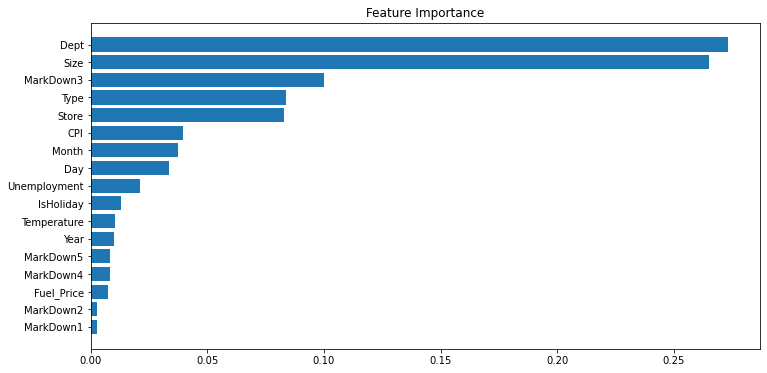

In [338]:
X_test = pd.DataFrame(X_test, columns=X.columns)
feature_importance = xgbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
